In [1]:
import math
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
import jax.numpy as jnp
from jax import grad, jit, vmap

In [3]:
grad_sin = grad(jnp.sin)
print(grad_sin(math.pi/4))

0.70710677


In [4]:
def sq(x):
    return x**2

In [5]:
sq(2)

4

In [6]:
grad(sq)(3.0)

DeviceArray(6., dtype=float32)

In [7]:
def rate(t, y, k):
    dy = -k * y
    return dy

In [10]:
def sol_ode(k):
    y0 = [1]
    sol = solve_ivp(rate, [0, 10], y0, method = 'BDF', args = (k,))
    return sol.y[0]

AttributeError: 'numpy.ndarray' object has no attribute 't'

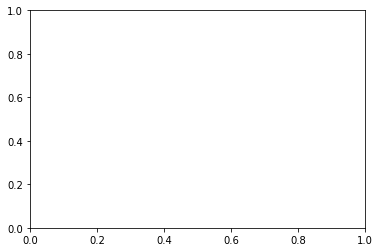

In [11]:
solres = sol_ode(0.5)
fig, ax = plt.subplots()
ax.plot(solres.t, solres)

In [12]:
tmp_grad = grad(sol_ode)

In [13]:
tmp_grad(1.0)

TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on the JAX Tracer object Traced<ConcreteArray([-1.])>with<JVPTrace(level=2/0)>
  with primal = DeviceArray([-1.], dtype=float32)
       tangent = Traced<ShapedArray(float32[1]):JaxprTrace(level=1/0)>
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError